In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(18175, 136)

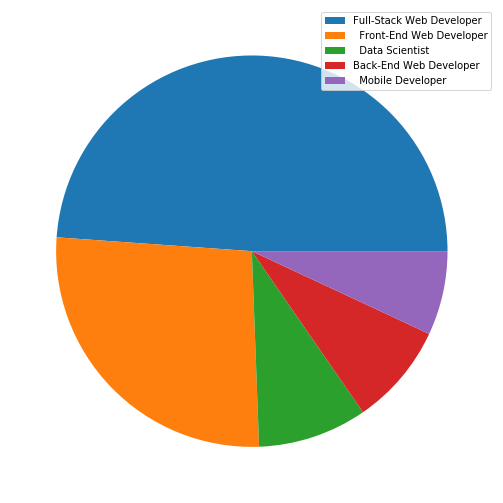

In [31]:
plt.figure(figsize=(16,9))
ax = plt.gca()
plt.pie((df['JobRoleInterest'].value_counts(normalize=True)*100).sort_values(ascending=False).head(5))
plt.legend((df['JobRoleInterest'].value_counts(normalize=True)*100).sort_values(ascending=False).head(5).index)

In [19]:
df['JobRoleInterest'].str.contains('[Ww]eb').sum()

5781

In [21]:
df['JobRoleInterest'].str.contains('[Mm]obile').sum()

2305

In [39]:
df.dropna(subset=['JobRoleInterest'], inplace=True)

In [42]:
df['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Panama                         1
Nambia                         1
Guatemala                      1
Cuba                           1
Channel Islands                1
Name: CountryLive, Length: 137, dtype: int64

In [44]:
df['CountryLive'].value_counts(normalize=True)*100

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
                              ...    
Panama                       0.014624
Nambia                       0.014624
Guatemala                    0.014624
Cuba                         0.014624
Channel Islands              0.014624
Name: CountryLive, Length: 137, dtype: float64

In [48]:
df['MoneyPerMonth'] = df['MoneyForLearning'] / (df['MonthsProgramming'].replace({0:1}))

In [51]:
df['MoneyPerMonth'].value_counts(dropna=False)

0.000000        3092
NaN              675
50.000000        128
25.000000        120
16.666667        118
                ... 
3.076923           1
10.833333          1
30000.000000       1
312.500000         1
611.111111         1
Name: MoneyPerMonth, Length: 494, dtype: int64

In [61]:
df.dropna(subset=['MoneyPerMonth', 'CountryLive'],inplace=True)

In [190]:
df[df['CountryLive'].str.contains(r'United States|Canada|India|United Kingdom')].groupby('CountryLive')['MoneyPerMonth'].mean().sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MoneyPerMonth, dtype: float64

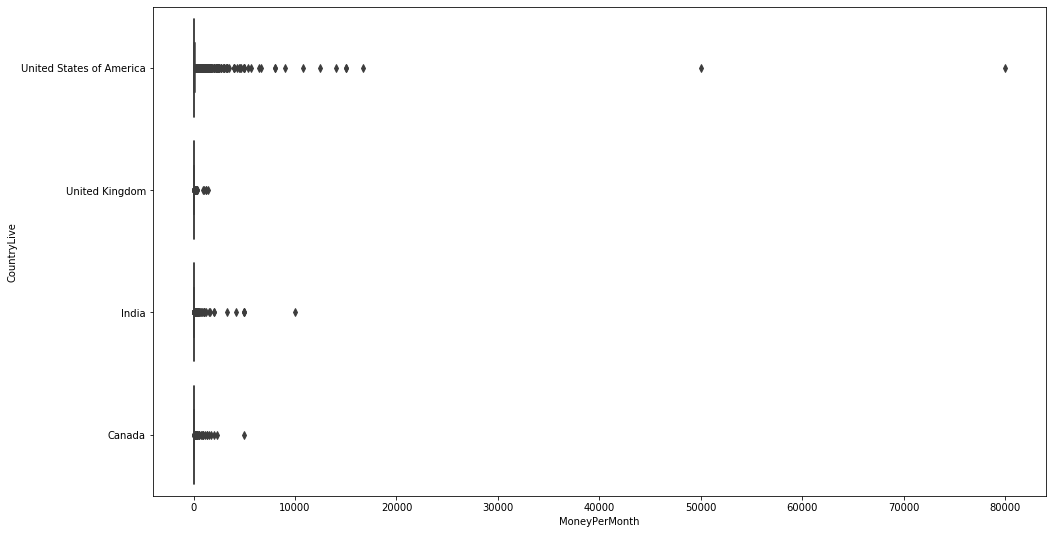

In [72]:
plt.figure(figsize=(16,9))
ax = plt.gca()
sns.boxplot(y=df[df['CountryLive'].str.contains(r'United States|Canada|India|United Kingdom')]['CountryLive'], x=df[df['CountryLive'].str.contains(r'United States|Canada|India|United Kingdom')]['MoneyPerMonth'])

In [211]:
top4 = df[df['CountryLive'].str.contains(r'United States|Canada|India|United Kingdom')][['CountryLive','MoneyPerMonth']]

In [217]:
means = top4.groupby('CountryLive')['MoneyPerMonth'].mean()

In [215]:
stds = top4.groupby('CountryLive')['MoneyPerMonth'].std()

In [226]:
three_stds = means+(3*stds)

In [232]:
three_stds

CountryLive
Canada                      1436.553434
India                       2213.982116
United Kingdom               532.469951
United States of America    6048.734838
Name: MoneyPerMonth, dtype: float64

In [237]:
for index in three_stds.index:
    top4.drop(index=top4[(top4['CountryLive']==index)&(top4['MoneyPerMonth']>three_stds[index])].index, inplace=True)

In [240]:
top4.groupby('CountryLive')['MoneyPerMonth'].mean()

CountryLive
Canada                       62.363676
India                        65.758763
United Kingdom               25.245838
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

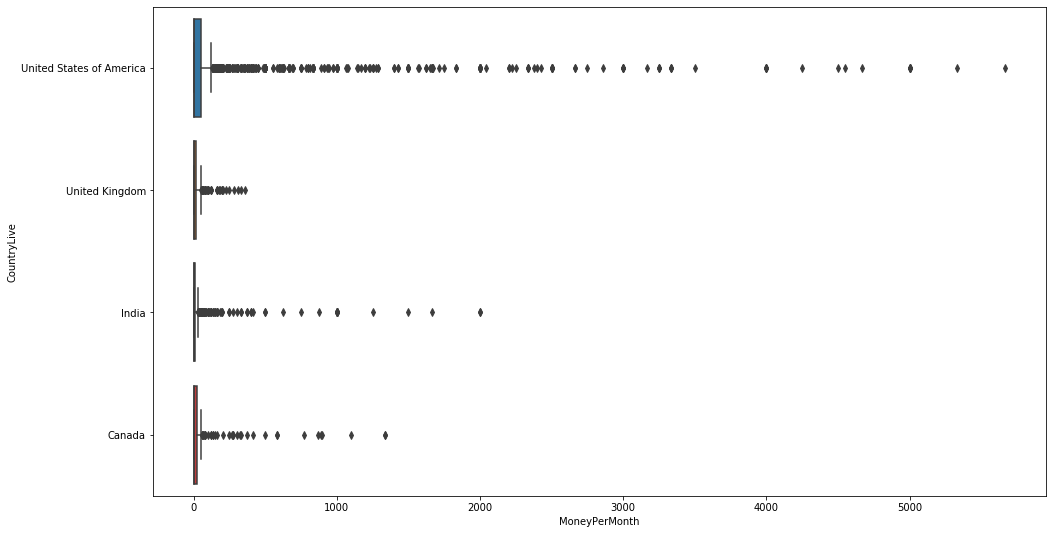

In [242]:
plt.figure(figsize=(16,9))
ax = plt.gca()
sns.boxplot(x='MoneyPerMonth', y='CountryLive', data=top4)